In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline

Error handling to check if the input files are not of the desired format.

In [2]:
try:
    data=pd.read_csv('Assignment-gene_data.csv',index_col=0)
except pd.errors.EmptyDataError as e:
    print(e)
    print("Not a CSV file or file not exist")

/home/user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
 data.set_index('symbol',inplace=True)
 print(data.keys())
 print('')
 print('Total rows in data set are:',data.shape[0])
 print('Total columns in data set are:',data.shape[0])

Index(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21',
       'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30'],
      dtype='object')

Total rows in data set are: 22411
Total columns in data set are: 22411


In [4]:
data.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
symbol,,,,,,,,,,,,,,,,,,,,,
Zzz3,253.401685,402.8508776,230.957463,688.486264,358.067836,344.962350,441.155001,301.149694,390.361685,431.707182,...,507.882774,465.081486,415.478767,297.061149,488.848114,367.912141,307.199908,347.802509,411.227261,283.709694
Zzef1,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
Zyx,40.578958,49.23516006,59.472005,46.212152,61.969671,55.732843,53.819870,54.315691,73.016585,51.144296,...,33.512262,36.751853,36.952457,35.718610,27.346198,32.647887,42.006833,32.324596,41.426033,32.754971
Zyg11b,26.373102,35.00190057,32.389728,34.932372,35.192365,33.858459,27.948378,21.152797,32.283053,30.057553,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
Zyg11a,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797


In [5]:
data.dtypes

S1     float64
S2      object
S3     float64
S4     float64
S5     float64
S6     float64
S7     float64
S8     float64
S9     float64
S10    float64
S11    float64
S12    float64
S13     object
S14    float64
S15    float64
S16    float64
S17    float64
S18    float64
S19    float64
S20    float64
S21    float64
S22    float64
S23    float64
S24    float64
S25    float64
S26    float64
S27    float64
S28    float64
S29    float64
S30    float64
dtype: object

From our dataframe we need to convert object type to float type data for further computation. 

In [6]:
data['S2'] = data['S2'].apply(pd.to_numeric, errors='coerce')
data['S13'] = data['S13'].apply(pd.to_numeric, errors='coerce')

In [7]:
data.dtypes

S1     float64
S2     float64
S3     float64
S4     float64
S5     float64
S6     float64
S7     float64
S8     float64
S9     float64
S10    float64
S11    float64
S12    float64
S13    float64
S14    float64
S15    float64
S16    float64
S17    float64
S18    float64
S19    float64
S20    float64
S21    float64
S22    float64
S23    float64
S24    float64
S25    float64
S26    float64
S27    float64
S28    float64
S29    float64
S30    float64
dtype: object

In [8]:
data.isnull().sum()

S1     0
S2     1
S3     0
S4     0
S5     0
S6     0
S7     0
S8     0
S9     0
S10    0
S11    0
S12    0
S13    1
S14    0
S15    0
S16    0
S17    0
S18    0
S19    0
S20    0
S21    1
S22    0
S23    0
S24    0
S25    0
S26    0
S27    0
S28    0
S29    0
S30    0
dtype: int64

In [9]:
#computing missing value
median_value1=data['S2'].median()
median_value2=data['S13'].median()
median_value3=data['S21'].median()
data['S2']=data['S2'].fillna(median_value1)
data['S13']=data['S13'].fillna(median_value2)
data['S21']=data['S21'].fillna(median_value3)
data.isnull().any().any()

False

In [10]:
x = data.iloc[:,:].values

We will use all 30 sample of our Genes will use an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

In [11]:
print(x)

[[253.4016849  402.8508776  230.9574627  ... 347.8025093  411.2272612
  283.7096943 ]
 [ 21.15279694  21.15279694  21.15279694 ...  21.15279694  21.15279694
   21.15279694]
 [ 40.57895796  49.23516006  59.47200461 ...  32.32459562  41.426033
   32.754971  ]
 ...
 [ 21.15279694  21.15279694  21.15279694 ...  21.15279694  21.15279694
   21.15279694]
 [ 21.15279694  21.15279694  21.15279694 ...  21.15279694  21.15279694
   21.15279694]
 [ 21.15279694  21.15279694  21.15279694 ...  21.15279694  21.15279694
   21.15279694]]


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaled_data=preprocessing.scale(x.T)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [14]:
pca=PCA()

In [15]:
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

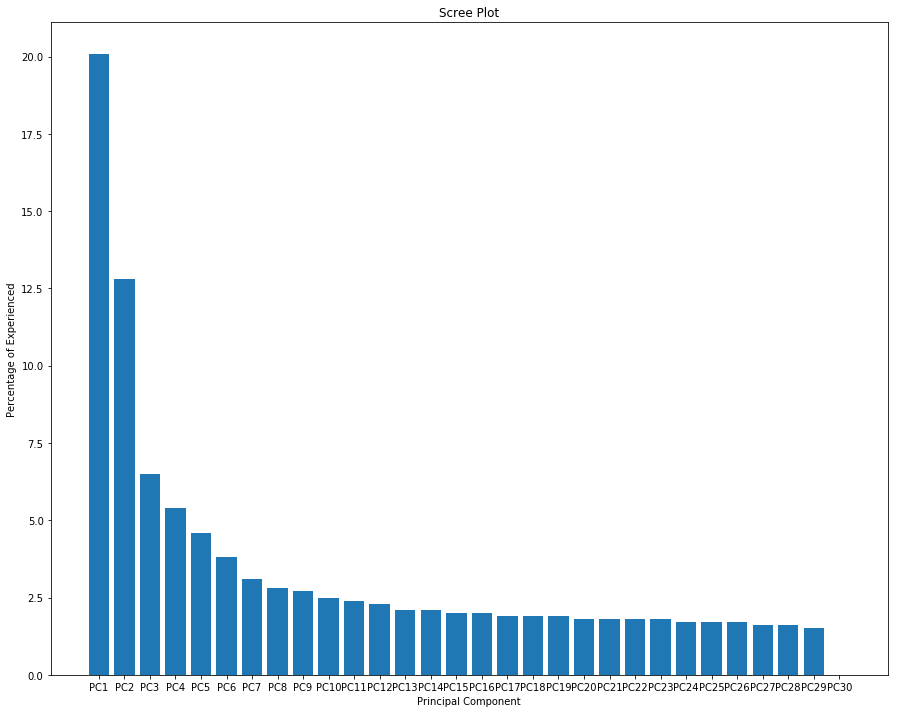

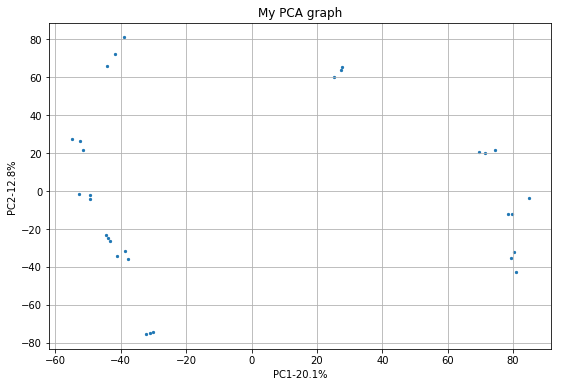

In [16]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

fig=plt.figure(figsize=(15,12))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Experienced')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

pca_df=pd.DataFrame(pca_data,columns=labels)


fig=plt.figure(figsize=(9,6))
plt.scatter(pca_df.PC1,pca_df.PC2,s=5)
plt.title('My PCA graph')
plt.xlabel('PC1-{0}%'.format(per_var[0]))
plt.ylabel('PC2-{0}%'.format(per_var[1]))

plt.grid()
plt.show()

